In [6]:
import pandas as pd


file_path = "Seasons_Stats.csv"
df = pd.read_csv(file_path)
print(df.head())


   Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]


In [14]:
#filtering for data after/druing the 2000s
df_filtered = df[df['Year'].str.contains(r'20[0-9]{2}', regex=True)]
print(df_filtered.head())

       Unnamed: 0    Year               Player Pos   Age   Tm     G    GS  \
14470       14470  2000.0    Tariq Abdul-Wahad  SG  25.0  TOT  61.0  56.0   
14471       14471  2000.0    Tariq Abdul-Wahad  SG  25.0  ORL  46.0  46.0   
14472       14472  2000.0    Tariq Abdul-Wahad  SG  25.0  DEN  15.0  10.0   
14473       14473  2000.0  Shareef Abdur-Rahim  SF  23.0  VAN  82.0  82.0   
14474       14474  2000.0       Cory Alexander  PG  26.0  DEN  29.0   2.0   

           MP   PER  ...    FT%    ORB    DRB    TRB    AST   STL   BLK  \
14470  1578.0  13.6  ...  0.756  101.0  190.0  291.0   98.0  59.0  28.0   
14471  1205.0  14.4  ...  0.762   77.0  162.0  239.0   72.0  53.0  16.0   
14472   373.0  10.8  ...  0.738   24.0   28.0   52.0   26.0   6.0  12.0   
14473  3223.0  20.2  ...  0.809  218.0  607.0  825.0  271.0  89.0  87.0   
14474   329.0   8.8  ...  0.773    8.0   34.0   42.0   58.0  24.0   2.0   

         TOV     PF     PTS  
14470  106.0  147.0   697.0  
14471   87.0  116.0   563.

In [16]:
#clear empty data
df= df.dropna(subset=['PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG%', '3P', '3PA', '3P%', 'eFG%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'])
print("Cleaned Data Shape:", df.shape)


Cleaned Data Shape: (15416, 53)


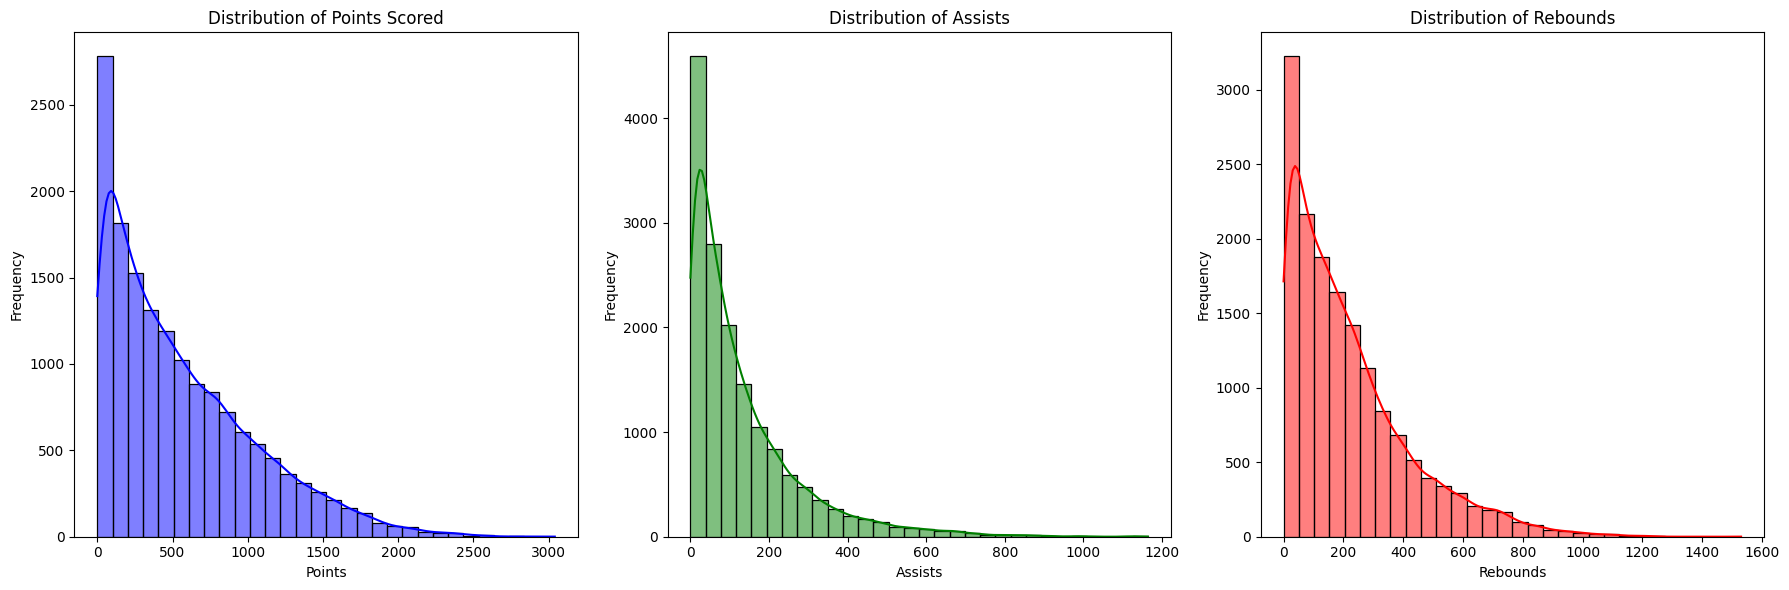

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

# Points Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['PTS'], bins=30, kde=True, color='blue')
plt.title('Distribution of Points Scored')
plt.xlabel('Points')
plt.ylabel('Frequency')

# Assists Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['AST'], bins=30, kde=True, color='green')
plt.title('Distribution of Assists')
plt.xlabel('Assists')
plt.ylabel('Frequency')

# Rebounds Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['TRB'], bins=30, kde=True, color='red')
plt.title('Distribution of Rebounds')
plt.xlabel('Rebounds')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


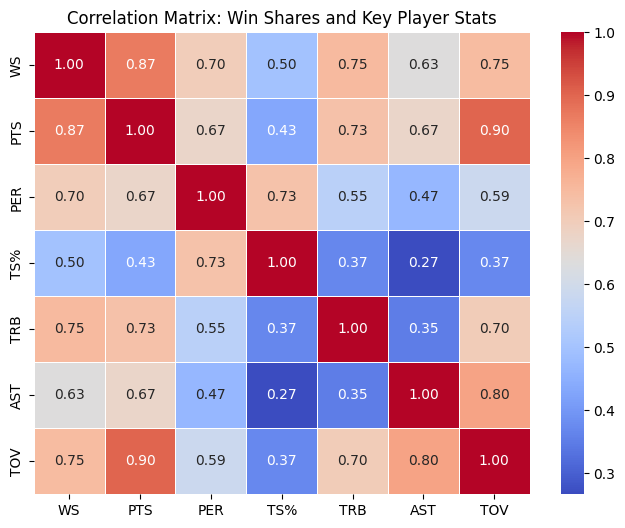

In [31]:
# Calculate the correlation matrix for Win Shares and the selected player stats
ws_corr = df[['WS', 'PTS', 'PER', 'TS%', 'TRB', 'AST', 'TOV']].corr()

# Plot the correlation matrix to visualize the relationships
plt.figure(figsize=(8, 6))
sns.heatmap(ws_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Win Shares and Key Player Stats')
plt.show()
